In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Loading the dataset:

In [ ]:
df = pd.read_csv('drive/MyDrive/Datasets/Packet_Mode.csv', low_memory=False)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("tcp.ack_raw", axis=1, inplace=True)
df.drop("udp.stream", axis=1, inplace=True)

print(df['Attack_type'].value_counts())

6    1363998
3     121567
1      67939
2      50062
7      49933
0      24026
8      19977
4        853
5        358
Name: Attack_type, dtype: int64


In [ ]:
df.columns

Index(['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'tcp.ack',
       'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.syn', 'tcp.connection.synack', 'tcp.flags',
       'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.time_delta',
       'mqtt.topic_len', 'Attack_type', 'mqtt.protoname-0',
       'mqtt.protoname-MQTT'],
      dtype='object')

In [ ]:
df.tail()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,tcp.ack,tcp.checksum,tcp.connection.fin,tcp.connection.rst,tcp.connection.syn,tcp.connection.synack,tcp.flags,tcp.flags.ack,tcp.len,tcp.seq,udp.time_delta,mqtt.topic_len,Attack_type,mqtt.protoname-0,mqtt.protoname-MQTT
1698708,0.0,0.0,0.0,0.0,190971.0,24177.0,0.0,0.0,0.0,0.0,16.0,1.0,1440.0,48413877.0,0.0,0.0,6,1,0
1698709,0.0,0.0,0.0,0.0,56.0,60612.0,0.0,0.0,0.0,0.0,16.0,1.0,0.0,5.0,0.0,0.0,6,1,0
1698710,0.0,0.0,0.0,0.0,15.0,43458.0,0.0,0.0,0.0,0.0,24.0,1.0,4.0,1.0,0.0,0.0,6,1,0
1698711,0.0,0.0,0.0,0.0,5.0,22126.0,1.0,0.0,0.0,0.0,25.0,1.0,2.0,56.0,0.0,0.0,6,1,0
1698712,0.0,0.0,0.0,0.0,6.0,36371.0,0.0,0.0,0.0,0.0,16.0,1.0,0.0,59.0,0.0,0.0,6,1,0


In [ ]:
df.shape

(1698713, 19)

Splitting the dataset into training and test sets:

In [ ]:
X = df.loc[:, df.columns != "Attack_type"]
y = df["Attack_type"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
#print(X_train.shape)

Shape of X: (1698713, 18)
Shape of y: (1698713,)


Implementing SMOTE on the training set:

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy=dict({5:10000, 6:10000}), random_state=10)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(Counter(y_train_res))

Counter({7: 1091438, 4: 97415, 2: 54283, 11: 40719, 8: 40074, 3: 39935, 13: 39849, 1: 38708, 12: 29438, 0: 19095, 9: 15971, 14: 12087, 5: 10000, 6: 10000, 10: 7755})


Building the model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

Training the model:

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)
start_time = time.time()
rf.fit(X_train.values, y_train.values)
print("Training time in seconds: ", time.time()-start_time)

Training time in seconds:  115.516028881073


Evaluating the model:

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

start_time = time.time()
y_pred = rf.predict(X_test.values)
print("Prediction time in seconds: ", time.time()-start_time)
print('Accuracy: ', accuracy_score(y_test.values, y_pred))
print('Precision :', precision_score(y_test.values, y_pred, average="macro"))
print('Recall: ', recall_score(y_test.values, y_pred, average="macro"))
print('F1: ', f1_score(y_test.values, y_pred, average="macro"))


Prediction time in seconds:  3.6042163372039795
Accuracy:  0.9988020356563638
Precision : 0.9923748460304908
Recall:  0.9538226507604044
F1:  0.9688820423473046


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
# confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4899
           1       1.00      1.00      1.00     13555
           2       1.00      1.00      1.00     10038
           3       1.00      1.00      1.00     24366
           4       1.00      0.65      0.79       171
           5       1.00      1.00      1.00        64
           6       1.00      1.00      1.00    272700
           7       0.98      1.00      0.99      9953
           8       0.95      1.00      0.97      3997

    accuracy                           1.00    339743
   macro avg       0.99      0.95      0.97    339743
weighted avg       1.00      1.00      1.00    339743



Confusion Matrix:

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[[9.29781588e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.67421923e-02
  3.34762196e-02]
 [0.00000000e+00 9.99852453e-01 0.00000000e+00 7.37735153e-05
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.37735153e-05]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.54970760e-01 0.00000000e+00 0.00000000e+00 1.22807018e-01
  2.22222222e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00

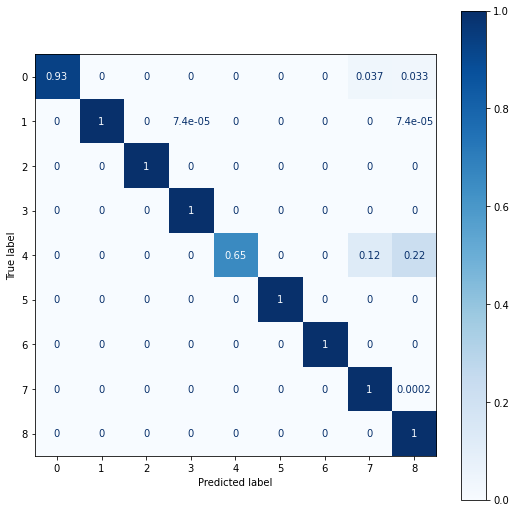

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

titles_options = [
    ("", "true"),
]
class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    #print(title)
    print(disp.confusion_matrix)
plt.gcf().set_size_inches(9, 9)
plt.show()

Saving the model:

In [ ]:
import pickle
pickle.dump(rf, open('RF_Classifier3.sav', 'wb'))

In [ ]:
df.to_csv('Dataset_new2.csv', encoding='utf-8')


cp: cannot stat 'Dataset_new2': No such file or directory


In [ ]:
! cp Dataset_new2.csv drive/MyDrive/Datasets/